In [2]:
import numpy as np
from numpy.linalg import *
import time
import matplotlib.pyplot as plt

In [3]:

M1 = np.matrix([[2, 3, 4], [ 10 , 12 , 5], [7,7,7]])
M2 = np.matrix([[1, 2, 1], [ 1 , 5 , 1], [2,8,2]])
transpose = np.transpose(M1)


print(f'Matrix: {M1}')
print(f"Transpose: {transpose}")
print(f"Dot: {M1*M2}")
print(f"Det: {det(M1)}")
print(f"Inv: {inv(M1)}")
print(f"Diag: {np.diag([3,3],2)}")
print(f"Dimention: {M1.shape}")


Matrix: [[ 2  3  4]
 [10 12  5]
 [ 7  7  7]]
Transpose: [[ 2 10  7]
 [ 3 12  7]
 [ 4  5  7]]
Dot: [[ 13  51  13]
 [ 32 120  32]
 [ 28 105  28]]
Det: -62.99999999999999
Inv: [[-0.77777778 -0.11111111  0.52380952]
 [ 0.55555556  0.22222222 -0.47619048]
 [ 0.22222222 -0.11111111  0.0952381 ]]
Diag: [[0 0 3 0]
 [0 0 0 3]
 [0 0 0 0]
 [0 0 0 0]]
Dimention: (3, 3)


Para resolver $Ax = b$, $x = A^{-1}b$

In [4]:
b = np.array([1, 2, 3])

start_time = time.time()
x = np.matmul(inv(M1), b)
end_time = time.time()
time1 = end_time - start_time
print(f"result: {x} \ntime: {end_time - start_time}")

start_time = time.time()
x = solve(M1, b)
end_time = time.time()
time2 = end_time - start_time
print(f"result: {x} \ntime: {end_time - start_time}")
print(f"speedup: {time1/time2}")

result: [[ 0.57142857 -0.42857143  0.28571429]] 
time: 0.0006277561187744141
result: [ 0.57142857 -0.42857143  0.28571429] 
time: 0.0003154277801513672
speedup: 1.9901738473167045


In [5]:
b = np.array([5,5,5])
np.r_[M1,[b]]
np.r_[M1,[b,b,b]]
np.append(M1,M1, 
          axis=0)

matrix([[ 2,  3,  4],
        [10, 12,  5],
        [ 7,  7,  7],
        [ 2,  3,  4],
        [10, 12,  5],
        [ 7,  7,  7]])

[[0.52700119 0.79246585]
 [0.2942717  0.8094251 ]]


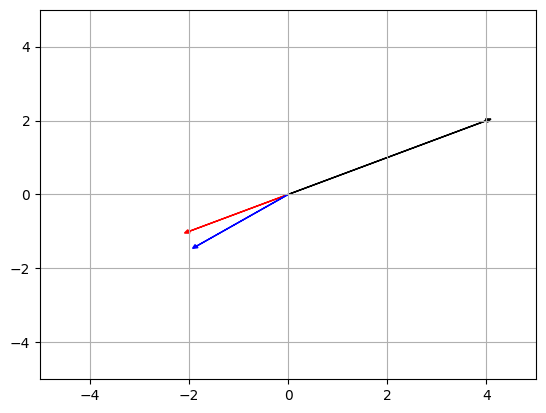

In [6]:
scalar = -.5
x, y = 4, 2
plt.arrow(0,0,x,y,head_width=0.1, head_length=0.1, fc='k', ec='k')
v1 = scalar*np.array([x,y])
plt.arrow(0,0,v1[0],v1[1],head_width=0.1, head_length=0.1, fc='r', ec='r')

A = np.random.rand(2,2)
print(A)
v2 = A@v1

plt.arrow(0,0,v2[0],v2[1],head_width=0.1, head_length=0.1, fc='b', ec='b')

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()

In [77]:
def gauss_jordan(A, b):
    for j in range(A.shape[1]):
        aj = A[j][j]
        for i in range(j + 1 , A.shape[0]):
            ai = A[i][j]
            scalar = - ai/aj
            A[i] = A[i] + (A[j] * scalar)
            b[i] = b[i] + (b[j]*scalar)
            if(i == j + 1):
                aii = A[i][i]
                A[i] = A[i]/aii
                b[i] = b[i]/aii

    x = np.zeros_like(b)
    for i in range(A.shape[0] - 1, -1, -1):
        val = 0
        for j in range(A.shape[1]-1,i - 1,-1):
            if(i == j): continue
            val += (-1* A[i][j])*x[j] 
        val += b[i]
        x[i] = val
    return x
    
  





A = np.array([[1,2,-1],[2,1,1], [3,2,2]])
b = [4, 1, 7]
gauss_jordan(A,b)

array([-5.        ,  6.66666667,  4.33333333])